In [ ]:
import numpy as pd
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.datasets import make_classification, make_circles, load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from mlxtend.plotting import plot_decision_regions


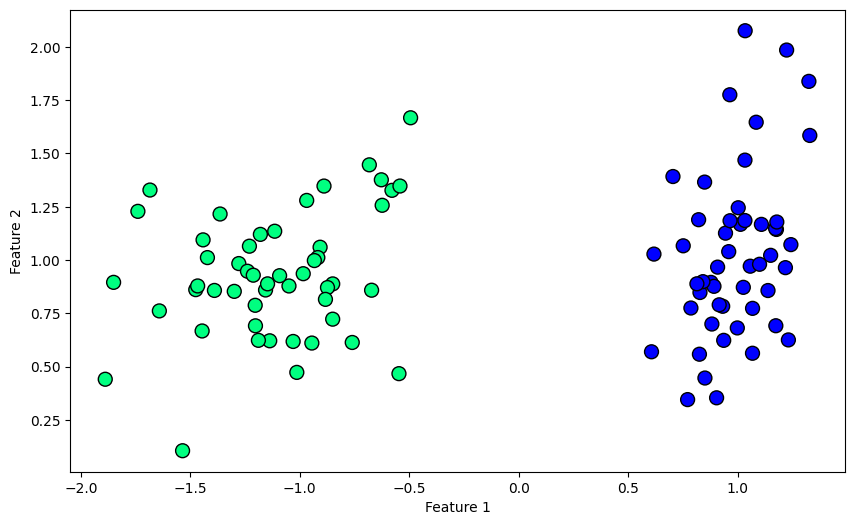

In [ ]:
np.random.seed(42)
X,y = make_classification(n_samples=100, n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1)
plt.figure(figsize=(10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap='winter', edgecolors='k', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linear_svm = svm.SVC(kernel='linear', C=1.0)
linear_svm.fit(X_train_scaled, y_train)

y_pred = linear_svm.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Confusion Matrix:
[[14  0]
 [ 0 16]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        16

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



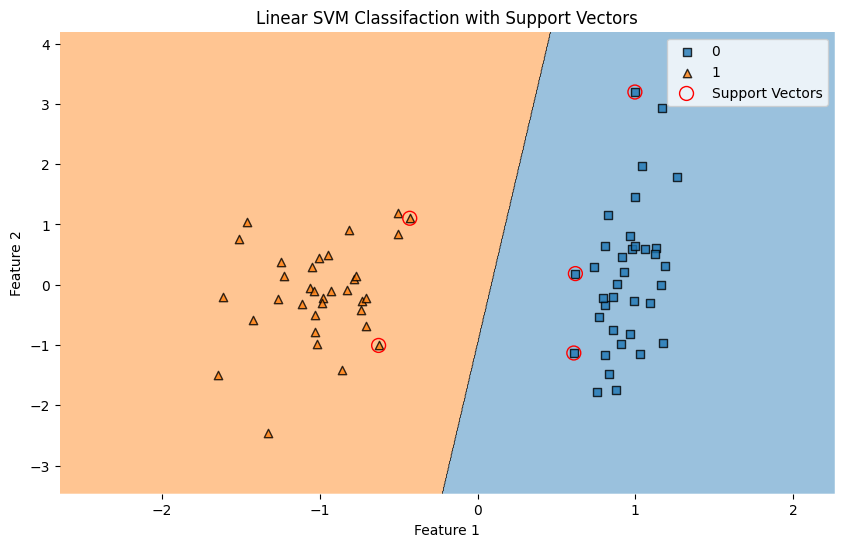

In [ ]:
def plot_svm_boundary(X, y, model, ax=None, title="SVM Decision Boundary"):
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    plot_decision_regions(X, y, clf=model, ax=ax)

    if hasattr(model, "support_vectors_"):
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='red', label='Support Vectors')
    ax.set_title(title)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    plt.show()
    return ax

    plt.figure(figsize=(10, 6))
plot_svm_boundary(X_train_scaled, y_train, linear_svm, title="Linear SVM Classifaction with Support Vectors")
plt.show()